In [18]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

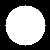

In [19]:
# Create a Circular Template
template = np.zeros((50, 50), dtype=np.uint8)
cv2.circle(template, (25, 25), 20, 255, -1)
# Display the result
cv2_imshow(template)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
# Apply Template Matching
image = cv2.imread('coins.png')  # Read as color image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale for template matching
result = cv2.matchTemplate(gray_image, template, cv2.TM_CCOEFF_NORMED)


In [ ]:
#Threshold the Result
threshold = 0.4
locations = np.where(result >= threshold)
# the first time that i use bigger threshold, it does not recognize all circles
# so i forced to decrease it.

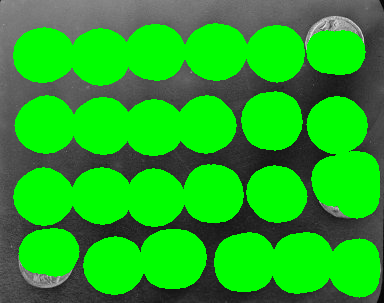

In [23]:
# Draw filled circles around matched regions
for pt in zip(*locations[::-1]):
    center = (pt[0] + template.shape[1]//2, pt[1] + template.shape[0]//2)
    radius = 20
    color = (0, 255, 0)
    cv2.circle(image, center, radius, color, -1)  # Draw filled circle
# Display the result
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
